## Logistic Regression 
Basically used for types of classification 
--- Spam, Loan default, etc

# uses sigmoid function to output values to values between 0 and 1
Thus:  Theta of Z is equal to 1 over 1 plus e to the power of negative Z
and this allows us to:
take linear regression solutions and place them into that sigmoid function


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Exploration analysis


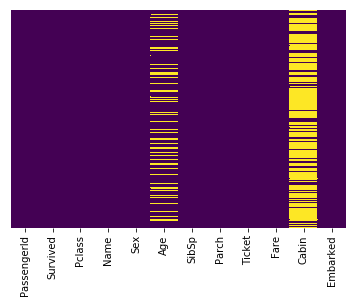

In [5]:
#heatmap to find missing data  using the "isnull" method
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# and what we see is that there are null valuesare in "age' or 'cabin'"

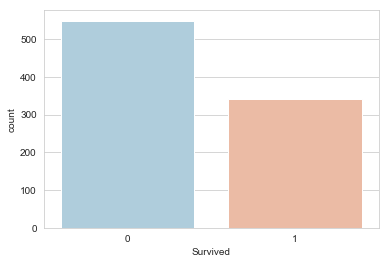

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

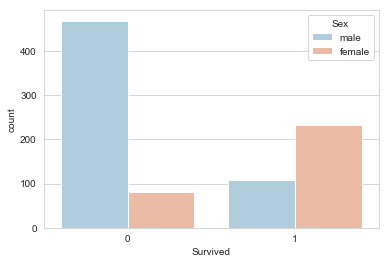

In [7]:
#survivived by gender
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
#The gender skew is crazy:  of approximately 50males only 100 survied. Of 300 women morethan 200 did survive. 

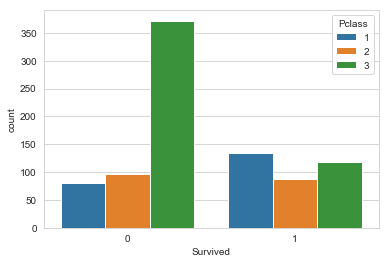

In [32]:
showing proability of survival by call
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,)

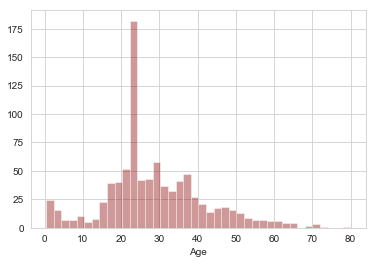

In [34]:
#Age distribution with null values dropped
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

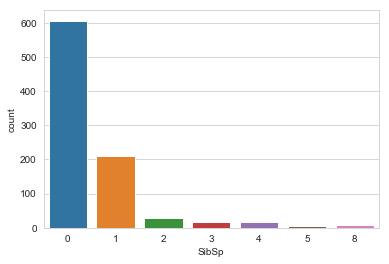

In [36]:
#what this shows is that most people were alone, ie, that 600 people had no spouses or children
sns.countplot(x='SibSp', data=train)

## Data Cleaning 

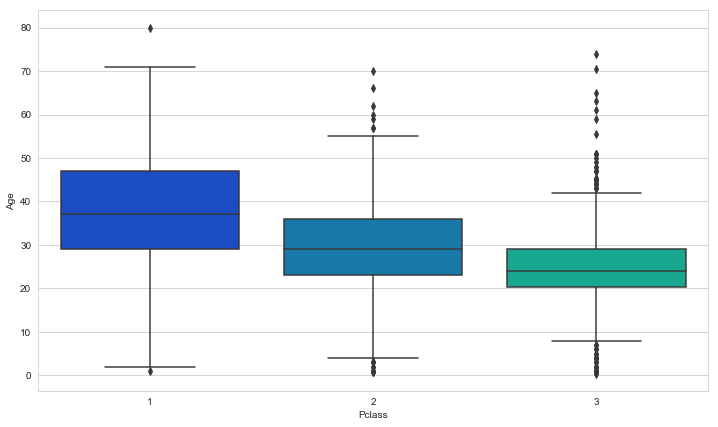

In [48]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [ ]:
#So what this does is to use the plot above to find the average age by class and then plugin that value if missing.  
#That is for first class, 37, second, 29 and third, 24

In [49]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [50]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

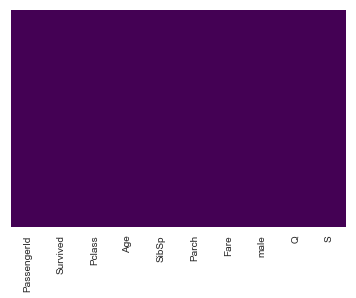

In [51]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Now to convert categorical features 
# that is, we need to change things like "male' and 'female' to numerical values

In [ ]:
#the drop first argument allows us to get rid of the equal predictor variables.  like for example, where not male is a predictor fro

In [55]:
# all columns....all numeric. 
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Build the logistic regression model

In [ ]:
X = all the rest
y = train['survived']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\marke\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
predictions = logmodel.predict(X_test)

## Evaluation

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test,predictions)

array([[151,  12],
       [ 36,  68]], dtype=int64)